In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [75]:
df=pd.read_csv('covid_data_copy.csv', usecols=['date', 'state', 'new_case', 'inpatient_beds_used', 'inpatient_beds_used_covid', 'tot_cases', 'Administered'])

In [76]:
df['date']=pd.to_datetime(df['date'])
mask=df['date']<=pd.to_datetime('2021-08-31')
df2=df[mask].copy()
mask=df2['date']>=pd.to_datetime('2020-03-28')
df3=df2[mask].copy()



In [77]:
mask=df3['state']=='ME'
df3.loc[mask,'state']='new_england'
mask=df3['state']=='RI'
df3.loc[mask,'state']='new_england'
mask=df3['state']=='VT'
df3.loc[mask,'state']='new_england'
mask=df3['state']=='CT'
df3.loc[mask,'state']='new_england'
mask=df3['state']=='NH'
df3.loc[mask,'state']='new_england'
mask=df3['state']=='MA'
df3.loc[mask,'state']='new_england'

In [78]:
dfne=df3[df3['state'] == 'new_england']

In [79]:
dfne2=dfne.groupby(by=["date","state"]).sum()

In [86]:
dfne2.to_csv('covid_data_new_england.csv')

In [87]:
dfne3=pd.read_csv('covid_data_new_england.csv', usecols=['date', 'state', 'new_case', 'inpatient_beds_used', 'inpatient_beds_used_covid', 'tot_cases', 'Administered'])

In [89]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.base import clone

In [ ]:
dfne_lag=dfne3['Administered'].shift(14)

In [90]:
dfne3 = dfne3.assign(Administered_lag=dfne_lag.values)

In [93]:
dfne3['date']=pd.to_datetime(dfne3['date'])

In [94]:
mask=dfne3['date']<=pd.to_datetime('2021-08-17')
dfne4=dfne3[mask].copy()
mask=dfne4['date']>=pd.to_datetime('2020-04-11')
dfne5=dfne4[mask].copy()

In [96]:
for value in dfne5['Administered_lag']:
    value=int(value)

In [97]:
dfne5_train = dfne5.sample(frac=.8, random_state=8675309).copy()
dfne5_test = dfne5.drop(dfne5.index).copy()

In [98]:
reg = LinearRegression(copy_X=True)
kfold = KFold(n_splits=5, shuffle=True, random_state=440)

In [99]:
reg = LinearRegression(copy_X=True)

reg.fit(dfne5_train[['tot_cases','new_case', 'Administered_lag']], dfne5_train['inpatient_beds_used_covid'])

errors = reg.predict(dfne5_train[['tot_cases','new_case', 'Administered_lag']]) - dfne5_train['inpatient_beds_used_covid']

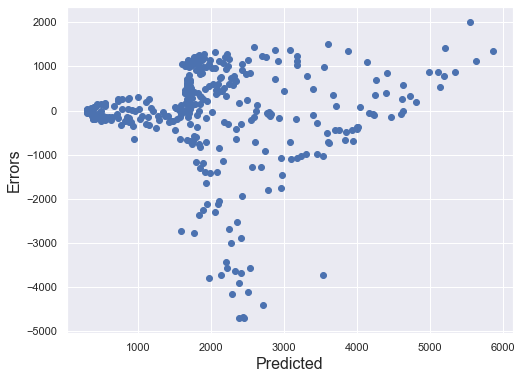

In [100]:
sns.set(font_scale=1)
plt.figure(figsize=(8,6))

plt.scatter(reg.predict(dfne5_train[['tot_cases','new_case', 'Administered_lag']]), errors)

plt.xlabel("Predicted", fontsize=16)
plt.ylabel("Errors", fontsize=16)

plt.show()